In [1]:
%run "../head.py"

In [2]:
import pandas as pd
import plotly.express as px
from lib.plot import plot_figure, plot_figure_canvas

In [3]:
batches = [
    "Sperm",
    "Sperm_hg",
    "mESC"
]

arg_bfs_lr_ft_files = { # single slice
    batch : (h.ddir / batch).with_suffix(".lr_ft.bfs.pkl")
    for batch in batches
}

arg_bfs_lr_ss_files = { # single slice
    batch : (h.ddir / batch).with_suffix(".lr_ss.bfs.pkl")
    for batch in batches
}

arg_bfs_dv_ss_files = {
    batch : (h.ddir / batch).with_suffix(".dv_ss.bfs.pkl")
    for batch in batches
}

### Mouse Sperm

### Ratio

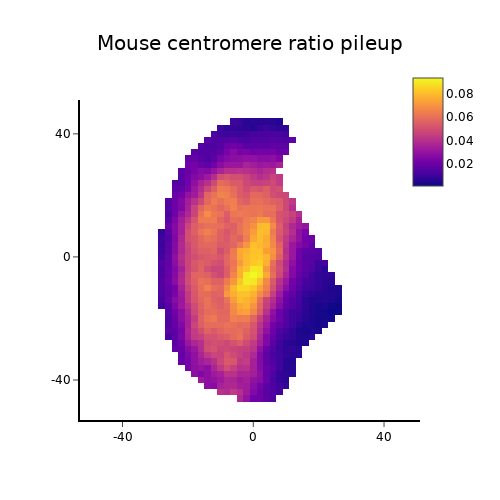

In [4]:
batch = "Sperm"
dist=5.0
if h.version == "0":
    min_cells = 489

    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
    count.loc[valid_cells < min_cells] = pd.NA
    density.loc[valid_cells < min_cells] = pd.NA
    data = (count / density).mean(axis=1)
    data = data.unstack()
    fig = plot_figure(
        data,
        size = 32,
        cmap = "Plasma",
        #cmap = "RdBu_r",
        #zmin = -1,
        #zmax = 1
    )
    fig.update_layout(
        title = f"mouse centromere ratio pileup (within {dist}M)",
        plot_bgcolor="white",
    )
elif h.version in ["1","2"]:
    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    contour = pd.read_pickle(h.fig1 / f"Fig1_contour/{batch}.lr_contour.v{h.version}.pkl")
    count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    data = (count / density).mean(axis=1)
    data[~contour] = pd.NA
    data = data.unstack()
    fig = plot_figure_canvas(
        data,
        #size = 32,
        square_size = 52,
        cmap = "Plasma",
        **h.template.layout.coloraxis.to_plotly_json(),
        #cmap = "RdBu_r",
        #zmin = -1,
        #zmax = 1
    )
    fig.update_xaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_yaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_layout(
        template = h.template,
        # (within {dist}M)
        title = f"Mouse centromere ratio pileup",
        plot_bgcolor="white",
    )    
fig.show(renderer="png")
fig.write_image("output/Mouse_centromere_ratio_pileup.pdf")

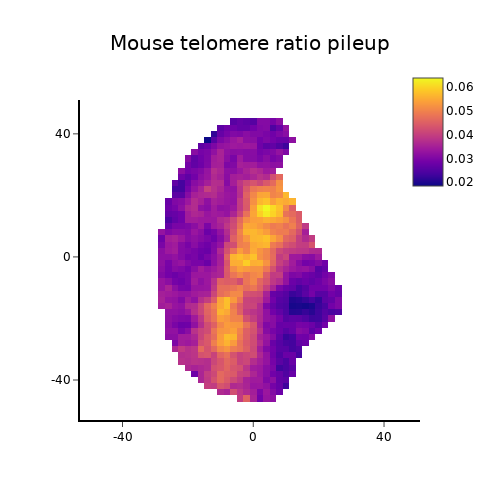

In [5]:
batch = "Sperm"
dist=5.0
if h.version == "0":
    min_cells = 489

    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
    count.loc[valid_cells < min_cells] = pd.NA
    density.loc[valid_cells < min_cells] = pd.NA
    data = (count / density).mean(axis=1)
    data = data.unstack()
    fig = plot_figure(
        data,
        size = 32,
        cmap = "Plasma",
        #cmap = "RdBu_r",
        #zmin = -1,
        #zmax = 1
    )
    fig.update_layout(
        title = f"mouse centromere ratio pileup (within {dist}M)",
        plot_bgcolor="white",
    )
elif h.version in ["1","2"]:
    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    contour = pd.read_pickle(h.fig1 / f"Fig1_contour/{batch}.lr_contour.v{h.version}.pkl")
    count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    data = (count / density).mean(axis=1)
    data[~contour] = pd.NA
    data = data.unstack()
    fig = plot_figure_canvas(
        data,
        #size = 32,
        square_size = 52,
        cmap = "Plasma",
        **h.template.layout.coloraxis.to_plotly_json(),
        #cmap = "RdBu_r",
        #zmin = -1,
        #zmax = 1
    )
    fig.update_xaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_yaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_layout(
        template = h.template,
        #title = f"mouse telomere ratio pileup (within {dist}M)",
        title = f"Mouse telomere ratio pileup",
        plot_bgcolor="white",
    )    
fig.show(renderer="png")
fig.write_image("output/Mouse_telomere_ratio_pileup.pdf")

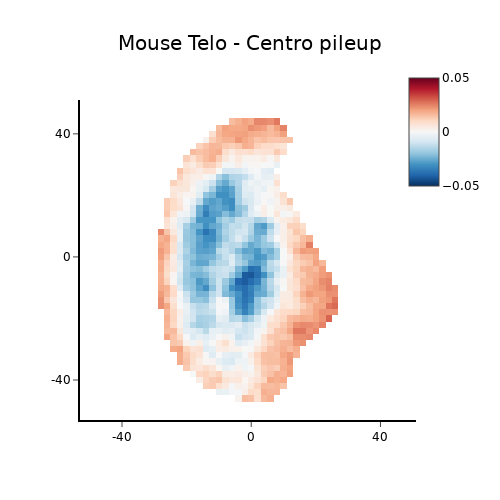

In [6]:
batch = "Sperm"
dist=5.0
if h.version == "0":
    min_cells = 489

    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
    count.loc[valid_cells < min_cells] = pd.NA
    density.loc[valid_cells < min_cells] = pd.NA
    data = (count / density).mean(axis=1)
    centro = data.unstack()

    count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
    count.loc[valid_cells < min_cells] = pd.NA
    density.loc[valid_cells < min_cells] = pd.NA
    data = (count / density).mean(axis=1)
    telo = data.unstack()

    fig = plot_figure(
        telo - centro,
        size = 32,
        cmap = "RdBu_r",
        zmin = -0.05,
        zmax = 0.05
    )
    fig.update_layout(
        title = f"mouse Telo - Centro pileup (within {dist}M)",
        plot_bgcolor="white",
    )
elif h.version in ["1","2"]:
    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    contour = pd.read_pickle(h.fig1 / f"Fig1_contour/{batch}.lr_contour.v{h.version}.pkl")

    count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    data = (count / density).mean(axis=1)
    data[~contour] = pd.NA
    centro = data.unstack()

    count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    data = (count / density).mean(axis=1)
    data[~contour] = pd.NA
    telo = data.unstack()

    fig = plot_figure_canvas(
        telo - centro,
        #size = 32,
        square_size = 52,
        cmap = "RdBu_r",
        zmin = -0.05,
        zmax = 0.05,
        **h.template.layout.coloraxis.to_plotly_json(),
    )
    fig.update_xaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_yaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_layout(
        template = h.template,
        #title = f"mouse Telo - Centro pileup (within {dist}M)",
        title = f"Mouse Telo - Centro pileup",
        plot_bgcolor="white",
    )
fig.show(renderer="png")
fig.write_image("output/Mouse_Telo-Centro_pileup.pdf")

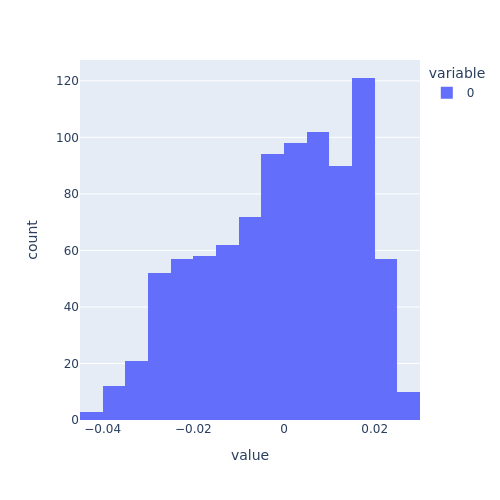

In [9]:
data = (telo - centro).stack()
fig = px.histogram(
    data,
)
fig.update_layout(
    height = 500,
    width = 500
)
fig.show(renderer="png")

### human centelo

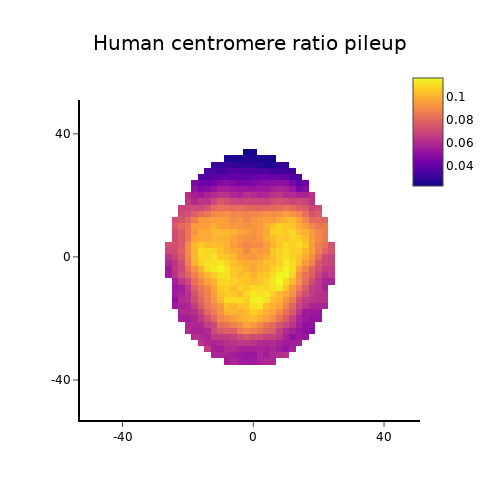

In [13]:
batch = "Sperm_hg"
dist=5.0

if h.version == "0":
    min_cells = 760

    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
    count.loc[valid_cells < min_cells] = pd.NA
    density.loc[valid_cells < min_cells] = pd.NA
    data = (count / density).median(axis=1)
    data = data.unstack()
    fig = plot_figure(
        data,
        size = 32,
        cmap = "Plasma",
        #cmap = "RdBu_r",
        #zmin = -1,
        #zmax = 1
    )
    fig.update_layout(
        title = f"human centromere ratio pileup (within {dist}M)",
        plot_bgcolor="white",
    )
elif h.version in ["1","2"]:
    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    contour = pd.read_pickle(h.fig1 / f"Fig1_contour/{batch}.lr_contour.v{h.version}.pkl")
    count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    data = (count / density).mean(axis=1)
    data[~contour] = pd.NA
    data = data.unstack()
    fig = plot_figure_canvas(
        data,
        #size = 32,
        square_size = 52,
        cmap = "Plasma",
        #cmap = "RdBu_r",
        #zmin = -1,
        #zmax = 1
        **h.template.layout.coloraxis.to_plotly_json(),
    )
    fig.update_xaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_yaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_layout(
        template = h.template,
        #title = f"human centromere ratio pileup (within {dist}M)",
        title = f"Human centromere ratio pileup",
        plot_bgcolor="white",
    )
fig.show(renderer="png")
fig.write_image("output/Human_centromere_ratio_pileup.pdf")

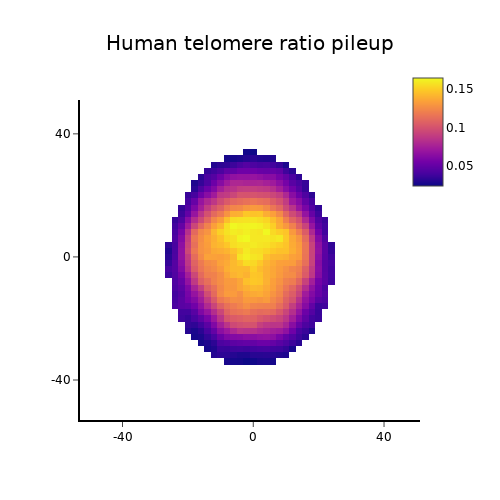

In [14]:
batch = "Sperm_hg"
dist=5.0
if h.version == "0":
    min_cells = 760

    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
    count.loc[valid_cells < min_cells] = pd.NA
    density.loc[valid_cells < min_cells] = pd.NA
    data = (count / density).median(axis=1)
    data = data.unstack()
    fig = plot_figure(
        data,
        size = 32,
        cmap = "Plasma",
        #cmap = "RdBu_r",
        #zmin = -1,
        #zmax = 1
    )
    fig.update_layout(
        title = f"human telomere ratio pileup (within {dist}M)",
        plot_bgcolor="white",
    )
elif h.version in ["1","2"]:
    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    contour = pd.read_pickle(h.fig1 / f"Fig1_contour/{batch}.lr_contour.v{h.version}.pkl")
    count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    data = (count / density).mean(axis=1)
    data[~contour] = pd.NA
    data = data.unstack()
    fig = plot_figure_canvas(
        data,
        #size = 32,
        square_size = 52,
        cmap = "Plasma",
        #cmap = "RdBu_r",
        #zmin = -1,
        #zmax = 1
        **h.template.layout.coloraxis.to_plotly_json(),
    )
    fig.update_xaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_yaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_layout(
        template = h.template,
        #title = f"human telomere ratio pileup (within {dist}M)",
        title = f"Human telomere ratio pileup",
        plot_bgcolor="white",
    )
fig.show(renderer="png")
fig.write_image("output/Human_telomere_ratio_pileup.pdf")

### explore

In [ ]:
batch = "Sperm"
min_cells = 489

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"5.0Mto10.0M_telo_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"5.0Mto10.0M_telo_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "Plasma",
    #cmap = "RdBu_r",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"mouse sperm 5.0-10.0M telomere pileup",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm"
min_cells = 489

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"5.0Mto10.0M_cent_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"5.0Mto10.0M_cent_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "Plasma_r",
    #cmap = "RdBu_r",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"mouse sperm 5.0-10.0M centromere pileup",
    plot_bgcolor="white",
)
fig.show(renderer="png")

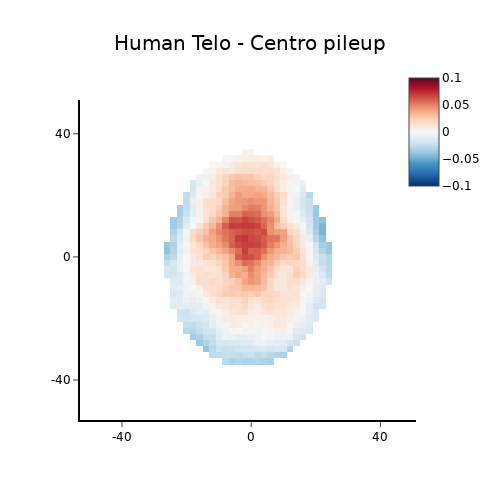

In [15]:
batch = "Sperm_hg"
dist=5.0
if h.version == "0":
    min_cells = 760

    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
    count.loc[valid_cells < min_cells] = pd.NA
    density.loc[valid_cells < min_cells] = pd.NA
    data = (count / density).median(axis=1)
    centro = data.unstack()

    count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
    count.loc[valid_cells < min_cells] = pd.NA
    density.loc[valid_cells < min_cells] = pd.NA
    data = (count / density).median(axis=1)
    telo = data.unstack()

    fig = plot_figure(
        telo - centro,
        size = 32,
        cmap = "RdBu_r",
        # zmin = -0.10,
        # zmax = 0.10
    )
    fig.update_layout(
        title = f"human Telo - Centro pileup (within {dist}M)",
        plot_bgcolor="white",
    )
elif h.version in ["1","2"]:
    slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
    contour = pd.read_pickle(h.fig1 / f"Fig1_contour/{batch}.lr_contour.v{h.version}.pkl")

    count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    data = (count / density).mean(axis=1)
    data[~contour] = pd.NA
    centro = data.unstack()

    count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
    density = slice_bfs["density"].copy()
    data = (count / density).mean(axis=1)
    data[~contour] = pd.NA
    telo = data.unstack()

    fig = plot_figure_canvas(
        telo - centro,
        #size = 32,
        square_size = 52,
        cmap = "RdBu_r",
        zmin = -0.10,
        zmax = 0.10,
        **h.template.layout.coloraxis.to_plotly_json(),
    )
    fig.update_xaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_yaxes(
        tickvals = [-40,0,40],
        ticktext = [-40,0,40],
    )
    fig.update_layout(
        template = h.template,
        title = f"Human Telo - Centro pileup",
        #title = f"human Telo - Centro pileup (within {dist}M)",
        plot_bgcolor="white",
    )
fig.show(renderer="png")
fig.write_image("output/Human_Telo-Centro_pileup.pdf")

### human no-mask

In [ ]:
from lib.metrics import df_contour

In [ ]:
contour = pd.read_pickle(
    "../Fig1_contour/Sperm_hg.lr_contour.pkl"
)
outer_contour = df_contour(contour.unstack()).stack()
contour_coords = outer_contour[
    outer_contour.astype(bool)
    ].reset_index()[["ht","dv"]]

In [ ]:
# contour_coords_smooth = contour_coords.copy()
# contour_coords_smooth["ht"] = contour_coords_smooth["ht"].rolling(1).mean()
# contour_coords_smooth["dv"] = contour_coords_smooth["dv"].rolling(1).mean()
# contour_coords_smooth = contour_coords_smooth.loc[contour_coords_smooth.index % 2 == 0]

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def sort_contour_points(points):
    # 初始化排序后的点集和已访问标记
    sorted_points = [points[0]]
    remaining_points = points[1:]
    while remaining_points:
        last_point = sorted_points[-1]
        distances = cdist([last_point], remaining_points)[0]
        nearest_index = np.argmin(distances)
        sorted_points.append(remaining_points.pop(nearest_index))
    return np.array(sorted_points)

In [ ]:
batch = "Sperm_hg"
dist=5.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
density = slice_bfs["density"].copy()
# valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
# count.loc[valid_cells < min_cells] = pd.NA
# density.loc[valid_cells < min_cells] = pd.NA
data = (count / density).mean(axis=1)
data = data.unstack().fillna(0)
fig = plot_figure(
    data,
    size = 32,
    cmap = "Plasma",
    #cmap = "RdBu_r",
    zmin = 0,
    zmax = 0.12
)
fig.add_scatter(
    x = contour_coords_smooth["dv"],
    y = contour_coords_smooth["ht"],
    mode = "markers",
    marker = dict(
        size = 4,
        color = "white"
    )
)
fig.update_layout(
    title = f"human centromere ratio pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=5.0
min_cells = 0

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
density = slice_bfs["density"].copy()
valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
count.loc[valid_cells < min_cells] = pd.NA
density.loc[valid_cells < min_cells] = pd.NA
data = (count / density).sum(axis=1)
data = data.unstack().fillna(0)
fig = plot_figure(
    data,
    size = 32,
    cmap = "Plasma",
    #cmap = "RdBu_r",
    #zmin = 0,
    #zmax = 0.18
)
fig.add_scatter(
    x = contour_coords["dv"],
    y = contour_coords["ht"],
    mode = "markers",
    marker = dict(
        size = 4,
        color = "white"
    )
)
fig.update_layout(
    title = f"human telomere ratio pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=10.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
density = slice_bfs["density"].copy()
valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
count.loc[valid_cells < min_cells] = pd.NA
density.loc[valid_cells < min_cells] = pd.NA
data = (count / density).mean(axis=1)
centro = data.unstack()

count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
density = slice_bfs["density"].copy()
valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
count.loc[valid_cells < min_cells] = pd.NA
density.loc[valid_cells < min_cells] = pd.NA
data = (count / density).mean(axis=1)
telo = data.unstack()

fig = plot_figure(
    telo - centro,
    size = 32,
    cmap = "RdBu_r",
    zmin = -0.10,
    zmax = 0.10
)
fig.update_layout(
    title = f"human Telo - Centro pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=10.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
density = slice_bfs["density"].copy()
valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
count.loc[valid_cells < min_cells] = pd.NA
density.loc[valid_cells < min_cells] = pd.NA
data = (count / density).mean(axis=1)
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "Plasma",
    #cmap = "RdBu_r",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"human telomere ratio pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=10.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
count = slice_bfs[f"{dist}M_cent_dist"].abs().copy()
density = slice_bfs["density"].copy()
valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
count.loc[valid_cells < min_cells] = pd.NA
density.loc[valid_cells < min_cells] = pd.NA
data = (count / density).mean(axis=1)
centro = data.unstack()

count = slice_bfs[f"{dist}M_telo_dist"].abs().copy()
density = slice_bfs["density"].copy()
valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
count.loc[valid_cells < min_cells] = pd.NA
density.loc[valid_cells < min_cells] = pd.NA
data = (count / density).mean(axis=1)
telo = data.unstack()

fig = plot_figure(
    telo - centro,
    size = 32,
    cmap = "RdBu_r",
    zmin = -0.10,
    zmax = 0.10
)
fig.update_layout(
    title = f"human Telo - Centro pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs["mean_centelo"].mean(axis=1).copy()
valid_cells = (~slice_bfs["mean_centelo"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "RdBu_r",
    zmax = 0.55,
    zmin = 0.45
)
fig.update_layout(
    title = "human sperm centro-telo pileup",
    plot_bgcolor = "rgba(0,0,0,0)",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=5.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"{dist}M_centelo_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"{dist}M_centelo_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "RdBu_r",
    zmin = -5,
    zmax = 5
)
fig.update_layout(
    title = f"human sperm centro-telo pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=1.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"{dist}M_centelo_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"{dist}M_centelo_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "RdBu_r",
    zmin = -1,
    zmax = 1
)
fig.update_layout(
    title = f"human sperm centro-telo pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=2.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"{dist}M_centelo_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"{dist}M_centelo_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "RdBu_r",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"human sperm centro-telo pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=5.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"{dist}M_cent_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "Plasma_r",
    #cmap = "RdBu_r",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"human sperm centromere pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "Sperm_hg"
dist=5.0
min_cells = 760

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"{dist}M_telo_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "Plasma",
    #cmap = "RdBu_r",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"human sperm telomere pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

### mESC centelo

In [ ]:
batch = "mESC"
min_cells = 20

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs["mean_centelo"].mean(axis=1).copy()
valid_cells = (~slice_bfs["mean_centelo"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "RdBu_r",
    zmax = 0.65,
    zmin = 0.35
)
fig.update_layout(
    title = "mESC centro-telo pileup",
    plot_bgcolor = "rgba(0,0,0,0)",
)
fig.show(renderer="png")

In [ ]:
batch = "mESC"
dist=5.0
min_cells = 20

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"{dist}M_centelo_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"{dist}M_centelo_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "RdBu_r",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"mESC centro-telo pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "mESC"
dist=5.0
min_cells = 20

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"{dist}M_cent_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"{dist}M_cent_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "Blues_r",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"mESC centromere pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")

In [ ]:
batch = "mESC"
dist=5.0
min_cells = 20

slice_bfs = pd.read_pickle(arg_bfs_lr_ss_files[batch])
data = slice_bfs[f"{dist}M_telo_dist"].mean(axis=1).copy()
valid_cells = (~slice_bfs[f"{dist}M_telo_dist"].isna()).sum(axis=1)
data.loc[valid_cells < min_cells] = pd.NA
data = data.unstack()
fig = plot_figure(
    data,
    size = 32,
    cmap = "Reds",
    #zmin = -1,
    #zmax = 1
)
fig.update_layout(
    title = f"mESC telomere pileup (within {dist}M)",
    plot_bgcolor="white",
)
fig.show(renderer="png")